**Задача:** Используя алгоритмы машинного обучения, создать модели, которые предсказывают какой пассажир 
    выжил после крушения на Титанике. 

**Данные:** 
Обучающая выборка должна быть использована для построения ваших моделей машинного обучения. Для обучающей выборки есть таргет *survived*. 

Тестовая выборка таргета не имеет. Она должна использоваться для оценки качества работы ваших моделей на платформе *kaggle.com*

**Подробнее о данных:** https://www.kaggle.com/competitions/titanic/data

**Loading datasets** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/test.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Describing data** 
Проанализировать все признаки. Для каждого признака определить:
* Получить основные статистики (`describe`)
* Количество пропусков
* Тип признака (категориальные, текстовые, числовые)
* Для категориальных данных определить уникальные значения
* Для категориальных данных построить bar plot (`plt.bar()`), определить признаковое распредение значений
* Для числовых признаков построить гистограмму (`plt.hist()`), попробовать разное количество бинов (*bins*) в разбиении. Определить тип распределения(равномерный, нормальный ...)

In [ ]:
# genral statistics about the dataset
train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Name**: *Text*

**Sex**:  *Categorial*

**Age**: *Numeric*

**Survived**: *Categorial*

**Embarked**: port (C, Q, S), *Categorial*

**Pclass**: social status,  *Categorial*

**SibSp**: number of spouces/siblings,  *Numeric*

**Parch**: number of parents/children,  *Numeric*

**Ticket**: *Text*

**Fare**: *Numeric*

**Cabin**: *Text*


**Count missing values**

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# another way to do it
print("\nAge missing values:",891 - train.Age[train.Age.notnull()].count())
print("\nCabin missing values:",891 - train.Cabin[train.Cabin.notnull()].count())
print("\nEmbarked missing values:",891 - train.Embarked[train.Embarked.notnull()].count())


Age missing values: 177

Cabin missing values: 687

Embarked missing values: 2


In [ ]:
# for categorial data, find unique values
print(list(train.Sex.unique()))
print(list(train.Embarked.unique()))
print(list(train.Pclass.unique()))

['male', 'female']
['S', 'C', 'Q', nan]
[3, 1, 2]


**Data Plotting**

Barplots and histograms

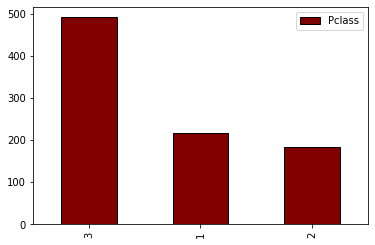

In [ ]:
train.Pclass.value_counts().to_frame().plot(kind="bar", color = "maroon", edgecolor = "black")

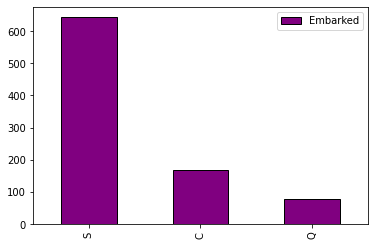

In [ ]:
train.Embarked.value_counts().to_frame().plot(kind="bar", color = "purple", edgecolor = "black")

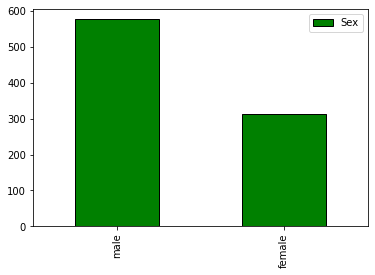

In [ ]:
train.Sex.value_counts().to_frame().plot(kind="bar", color = "green", edgecolor = "black")

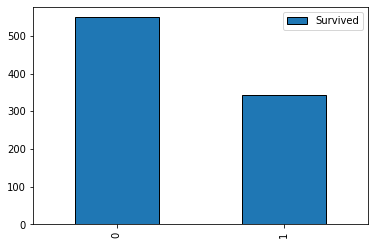

In [ ]:
train.Survived.value_counts().to_frame().plot(kind="bar", edgecolor = "black")

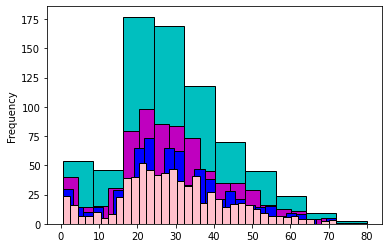

In [ ]:
# histograms
for b, c in zip([10, 20, 30, 40], ["c","m","b","pink"]):
  train.Age.plot(kind="hist", bins = b, color = c, edgecolor = 'black') 


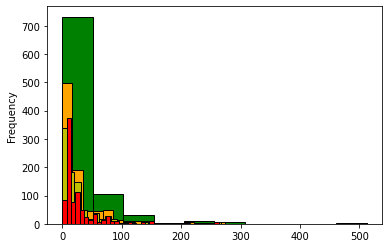

In [ ]:
for b, c in zip([10, 30, 50, 70], ["green","orange","y","red"]):
  train.Fare.plot(kind="hist", bins = b, color = c, edgecolor = 'black') 

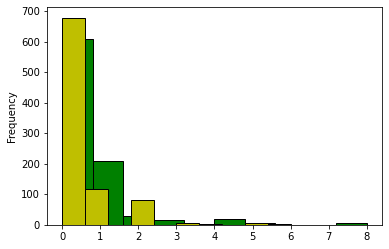

In [ ]:
# other numeric values
train.SibSp.plot(kind="hist", bins = 10, color = "g", edgecolor = 'black') 
train.Parch.plot(kind="hist", bins = 10, color = "y", edgecolor = 'black') 

**3.** Препроцессинг данных
Для каждого признака необходимо:
* Заменить пропуски
* Для категориальных текстовых признаков получить категориальные числовые (признак *Sex*). Попробовать из sklearn `LabelEncoder` и `OneHotEncoder` (на выбор)
* Нормализовать признаки

Замена пропусков может быть реализована через:
* заменой средним
* заменой медианой
* заменой модой (наиболее встречающимся значением)
* для категориальных признаков заменой наиболее встречающимся значением или созданием новой категории "не определено"
* заменой следующим или предыдущим значением (`fillna`)

Нормализация (*sklearn*):
* `MinMaxScaler`
* `StandartScaler`
* `RobustScaler`

Сделать для *train* и *test* данных.

In [ ]:
def modify_dataset(dataset):

  # replacing missing age values with mean
  dataset.Age = dataset.Age.fillna(dataset.Age.mean())

  # replacing missing embarked values with Unknown
  dataset.Embarked = dataset.Embarked.fillna("S") 

  # replacing text with numbers
  dataset.Embarked.replace(to_replace={'S':1, 'C':2, 'Q':3}, inplace=True)
  dataset.Sex.replace(to_replace={'male':1, 'female':0}, inplace=True)

  # adding a column that contains number of all relatives
  dataset["FamilySize"] = dataset.Parch + dataset.SibSp

  # adding deck codes from cabins
  decks = {"U": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
  # if cabin is NaN, then cabin is U
  dataset['Deck'] = dataset.Cabin.fillna('U').apply(lambda c: decks.get(c[0], -1))

  # dropping unimportant columns
  dataset = dataset.drop(columns = ["Cabin", "Ticket", "Name", "SibSp", "Parch"])

  return dataset


In [ ]:
train = modify_dataset(train)
test = modify_dataset(test)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Deck
0,1,0,3,1,22.0,7.2500,1,1,0
1,2,1,1,0,38.0,71.2833,2,1,3
2,3,1,3,0,26.0,7.9250,1,0,0
3,4,1,1,0,35.0,53.1000,1,1,3
4,5,0,3,1,35.0,8.0500,1,0,0


In [ ]:
from sklearn import preprocessing 
import numpy as np

def normalize_dataset(dataset, num_cols : list):
  # keep only umerical columns to be normalized
  data = dataset[num_cols] 
  # drop those columns from original dataset
  dataset = dataset.drop(columns= num_cols)
  vals = data.values
  min_max_scaler = preprocessing.MinMaxScaler()
  scaled = min_max_scaler.fit_transform(vals)
  # creating dataframe with normalized data 
  scaled = pd.DataFrame(scaled, columns = num_cols)
  # adding those columns to our original dataframe
  normalized = pd.concat([dataset, scaled],axis=1)

  return normalized

train = normalize_dataset(train, ['Age', 'Fare'])
test =  normalize_dataset(test, ['Age', 'Fare'])
train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,FamilySize,Deck,Age,Fare
0,1,0,3,1,1,1,0,0.271174,0.014151
1,2,1,1,0,2,1,3,0.472229,0.139136
2,3,1,3,0,1,0,0,0.321438,0.015469
3,4,1,1,0,1,1,3,0.434531,0.103644
4,5,0,3,1,1,0,0,0.434531,0.015713


**4.** Разбить данные для обучения на тренировочную и валидационную выборки. Для оценки качества модели необходимо проверить полученную модель на валидационных данных  (`train_test_split(X, y, random_state=42, stratify=y, test_size=20)`)

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop(columns = ["Survived"])
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=20)


**5.** 
#### Обучить на предобработанных данных следующие модели:
* Логистическая регрессия (`LogisticRegression`)
* Машины опорных векторов (`SVC`)
* Метод ближайших соседей (`KNeighborsClassifier`)
* Наивый байес (`GaussianNB`)
* Дерево решений (`DecisionTreeClassifier`)
* Случайный лес (`RandomForestClassifier`)
* Градиентный бустинг (`GradientBoostingClassifier`)

#### С каждой модели снять метрики, полученные на валидационных данных. Получить:
* *Accuracy*
* *Precision*
* *Recall*
* *F1-score*
* *ConfusionMatrix*

**Tip**:
`sklearn.metrics.classification_report`

#### Для каждой модели подобрать гиперпараметры, приносящие лучший скор на валидационных данных.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

**Logistic Regression**

Solves the classification problem by using a logistic function.

In [ ]:
# Used to find the best hyperparameters for a given model
def best_param(model, param_grid):
    gs = GridSearchCV(model,param_grid, cv=10)
    gs.fit(X_train,y_train)
    print("Best params: ",gs.best_params_)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

a_score_lr = accuracy_score(y_test, lr_prediction)
prec_score_lr =precision_score(y_test, lr_prediction)
rec_score_lr = recall_score(y_test, lr_prediction)
f1_lr = f1_score(y_test, lr_prediction)
conf_matr_lr = confusion_matrix(y_test, lr_prediction)
print(conf_matr_lr)

[[12  0]
 [ 3  5]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**SVC**

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)

a_score_svc = accuracy_score(y_test, svc_prediction)
prec_score_svc =precision_score(y_test, svc_prediction)
rec_score_svc = recall_score(y_test, svc_prediction)
f1_svc = f1_score(y_test, svc_prediction)
conf_matr_svc = confusion_matrix(y_test, svc_prediction)
print(conf_matr_svc)

[[12  0]
 [ 8  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNeighborsClassifier**

In [ ]:
neighbors = KNeighborsClassifier()
neighbors.fit(X_train, y_train)
neighbors_prediction = neighbors.predict(X_test)

a_score_neighbors = accuracy_score(y_test, neighbors_prediction)
prec_score_neighbors =precision_score(y_test, neighbors_prediction)
rec_score_neighbors = recall_score(y_test, neighbors_prediction)
f1_neighbors = f1_score(y_test, neighbors_prediction)
conf_matr_neighbors = confusion_matrix(y_test, neighbors_prediction)

**GaussianNB**

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_prediction = nb.predict(X_test)

a_score_nb = accuracy_score(y_test, nb_prediction)
prec_score_nb =precision_score(y_test, nb_prediction)
rec_score_nb = recall_score(y_test, nb_prediction)
f1_nb = f1_score(y_test, nb_prediction)
conf_matr_nb = confusion_matrix(y_test, nb_prediction)
print(conf_matr_nb)


[[10  2]
 [ 3  5]]


**Decision Tree Classifier**

Each tree node corresponds to a certain feature. If feature value is less then certain criteria, the left branch will be chosen, otherwise - the right.

In [ ]:
param_grid={
    'max_depth':[5,15,25],
    'min_samples_leaf':[1,3,5],
    'max_leaf_nodes':[10,20,35,50]
}
classifier = DecisionTreeClassifier(criterion='entropy')
best_param(classifier,param_grid)

Best params:  {'max_depth': 25, 'max_leaf_nodes': 10, 'min_samples_leaf': 3}


In [ ]:
dt =DecisionTreeClassifier(criterion='entropy',max_depth=15,max_leaf_nodes=10,min_samples_leaf=1)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

a_score_dt = accuracy_score(y_test, dt_prediction)
prec_score_dt =precision_score(y_test, dt_prediction)
rec_score_dt = recall_score(y_test, dt_prediction)
f1_dt = f1_score(y_test, dt_prediction)
conf_matr_dt = confusion_matrix(y_test, dt_prediction)

**Random Forest Classifier**

This model consists of few Decision Trees. Each tree learns from different sample datasets. The final decision will be made after voting.

In [ ]:
# finiding the best parameters using the GridSearchCV
param_grid={'n_estimators':[10,25,50,75,100]}
classifier_RF=RandomForestClassifier(random_state=1)
best_param(classifier_RF,param_grid)


Best params:  {'n_estimators': 75}


In [ ]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=75)
rf.fit(X_train,y_train)
rf_prediction = rf.predict(X_test)

a_score_rf = accuracy_score(y_test, rf_prediction)
prec_score_rf =precision_score(y_test, rf_prediction)
rec_score_rf = recall_score(y_test, rf_prediction)
f1_rf = f1_score(y_test, rf_prediction)
conf_matr_rf = confusion_matrix(y_test, rf_prediction)


**GradientBoostingClassifier**

It is a sequence of small trees, each tree learns from previous mistakes.

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_prediction = gb.predict(X_test)

a_score_gb = accuracy_score(y_test, gb_prediction)
prec_score_gb =precision_score(y_test, gb_prediction)
rec_score_gb = recall_score(y_test, gb_prediction)
f1_gb = f1_score(y_test, gb_prediction)
conf_matr_gb = confusion_matrix(y_test, gb_prediction)

**Choosing the best model**

In [ ]:
data = [["Logistic Regression",a_score_lr, prec_score_lr, rec_score_lr,f1_lr, conf_matr_lr],
        ["SVC",a_score_svc, prec_score_svc, rec_score_svc,f1_svc, conf_matr_svc],
        ["NB",a_score_nb, prec_score_nb, rec_score_nb,f1_nb, conf_matr_nb],
        ["KNeighbors",a_score_neighbors, prec_score_neighbors, 
         rec_score_neighbors,f1_neighbors, conf_matr_neighbors],
        ["Decision Tree",a_score_dt, prec_score_dt, rec_score_dt,f1_dt, conf_matr_dt],
        ["Random Forest",a_score_rf, prec_score_rf, rec_score_rf,f1_rf, conf_matr_rf],
        ["Gradient Boosting",a_score_gb, prec_score_gb, rec_score_gb,f1_gb, conf_matr_gb]]

colnames = ["Model","Accuracy","Precision","Recall","F1-score", "Matrix" ]
statistics = pd.DataFrame(data, columns= colnames)
statistics

,Model,Accuracy,Precision,Recall,F1-score,Matrix
0,Logistic Regression,0.85,1.000000,0.625,0.769231,"[[12, 0], [3, 5]]"
1,SVC,0.60,0.000000,0.000,0.000000,"[[12, 0], [8, 0]]"
2,NB,0.75,0.714286,0.625,0.666667,"[[10, 2], [3, 5]]"
3,KNeighbors,0.65,0.600000,0.375,0.461538,"[[10, 2], [5, 3]]"
4,Decision Tree,0.80,0.833333,0.625,0.714286,"[[11, 1], [3, 5]]"
5,Random Forest,0.90,0.875000,0.875,0.875000,"[[11, 1], [1, 7]]"
6,Gradient Boosting,0.85,1.000000,0.625,0.769231,"[[12, 0], [3, 5]]"


**6.** 
#### Получить лучший результ на kaggle.com
* Зарегистрироваться на https://www.kaggle.com
* Перейти по ссылке: https://www.kaggle.com/c/titanic/submit
* Засабмитить полученный csv файл и получить результат (*accuracy*)

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Embarked       0
FamilySize     0
Deck           0
Age            0
Fare           1
dtype: int64

In [ ]:
 test["Fare"] = test.Fare.fillna(test.Fare.mean())

In [ ]:
res = lr.predict(test).astype(int)
submission = pd.DataFrame({"PassengerId": test['PassengerId'],
                          "Survived": res})
# submission.to_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv', index=False)

**Logical Regression Model** = 74 %

In [ ]:
res = rf.predict(test).astype(int)
submission = pd.DataFrame({"PassengerId": test['PassengerId'],
                          "Survived": res})
# submission.to_csv('/content/drive/MyDrive/Colab Notebooks/submission_forest.csv', index=False)

**Random Forest Model**

https://www.kaggle.com/competitions/titanic/leaderboard 
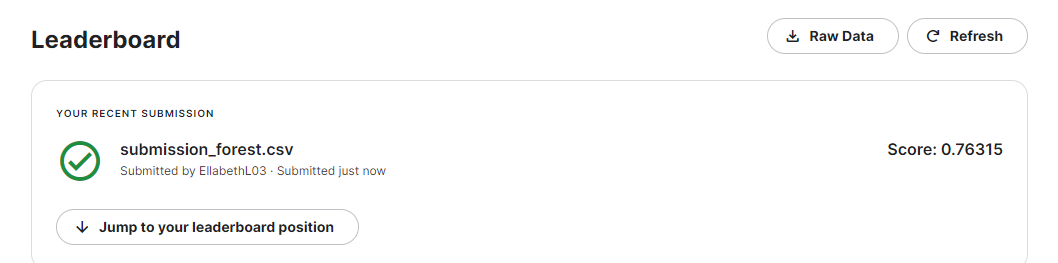